## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. I will use the Pima Indian diabetes dataset from Kaggle and KNN. 

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible 
#(NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
print(diabetes_data.shape)
diabetes_data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Glucose, Blood pressure, skin thickness, BMI and Insulin have minimum value of zero. which is not correct. It seems the Nan
values are filled with zero.**

**Number of pregnancy among women, aged between 21 and 81, is between zero and 17 with the mean of about 4.**

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].\
replace({0:np.nan})

In [6]:
diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

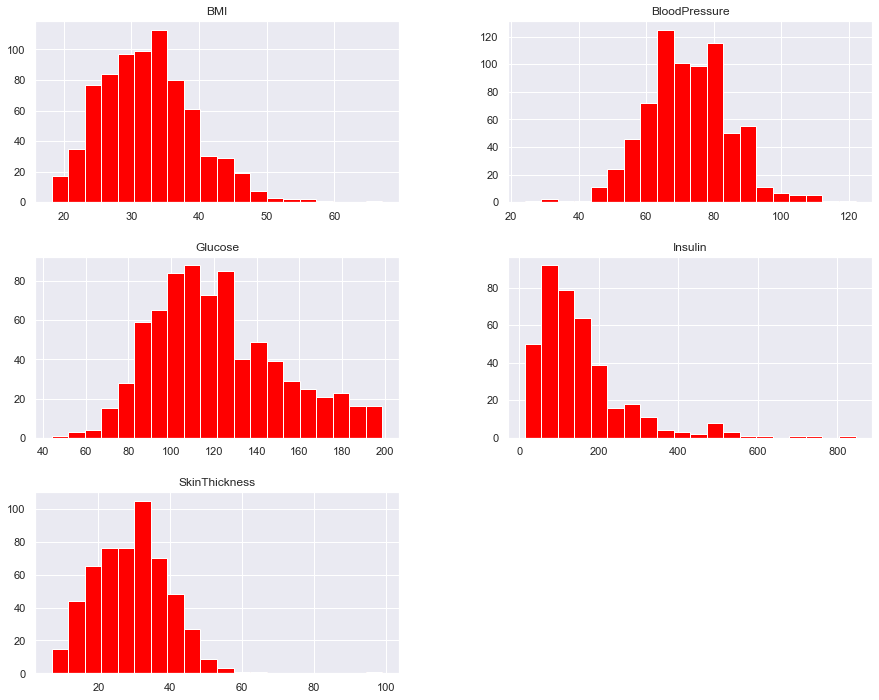

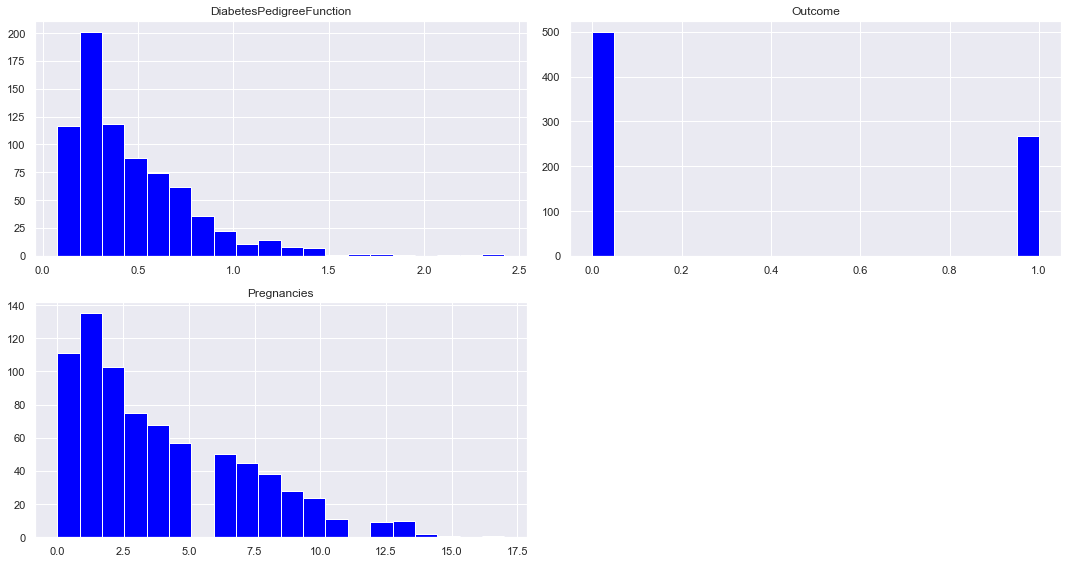

In [7]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(bins=20,figsize=(15,12),color='red')
diabetes_data[['Pregnancies','DiabetesPedigreeFunction','Outcome']].hist(bins=20,figsize=(15,8),color='Blue')
plt.tight_layout()
plt.show()

### This is an imbalanced sample, group 1(diabetic) is underpresented.

#### Replace the zeros with mean and median values.

In [8]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

<Figure size 432x288 with 0 Axes>

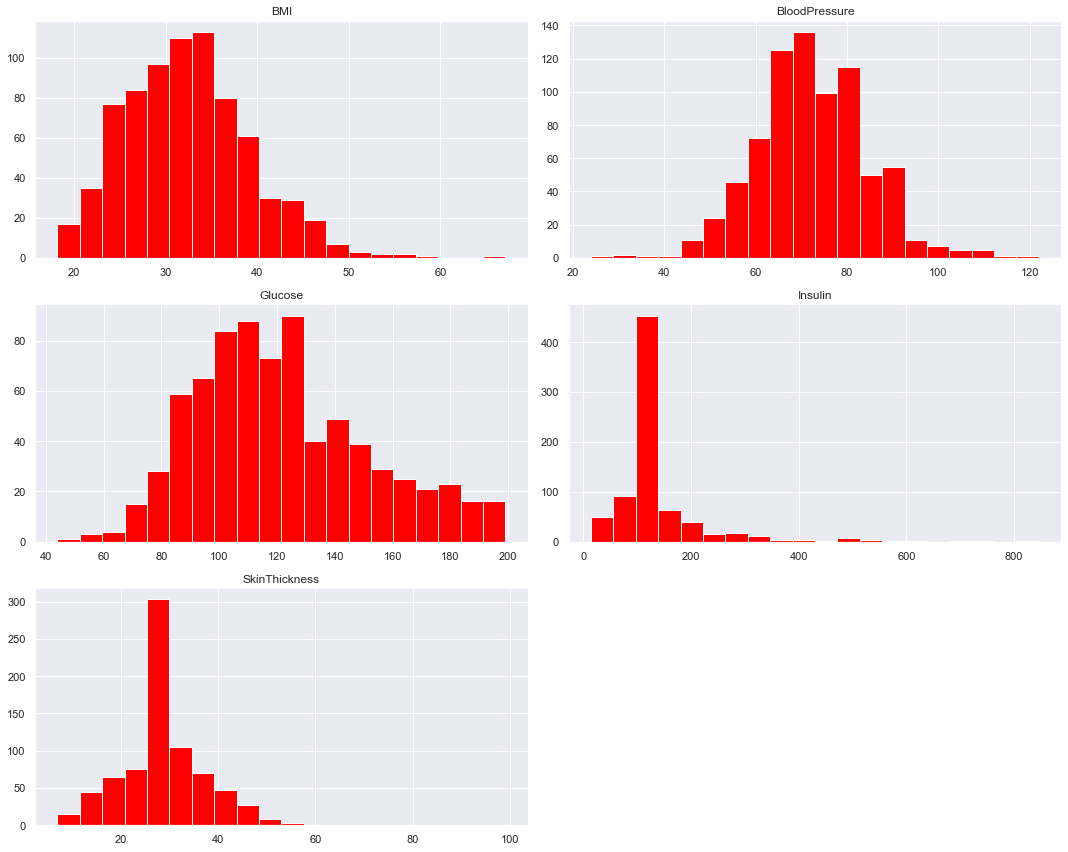

In [9]:
plt.figure()
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(bins=20, figsize=(15,12),color='red')
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


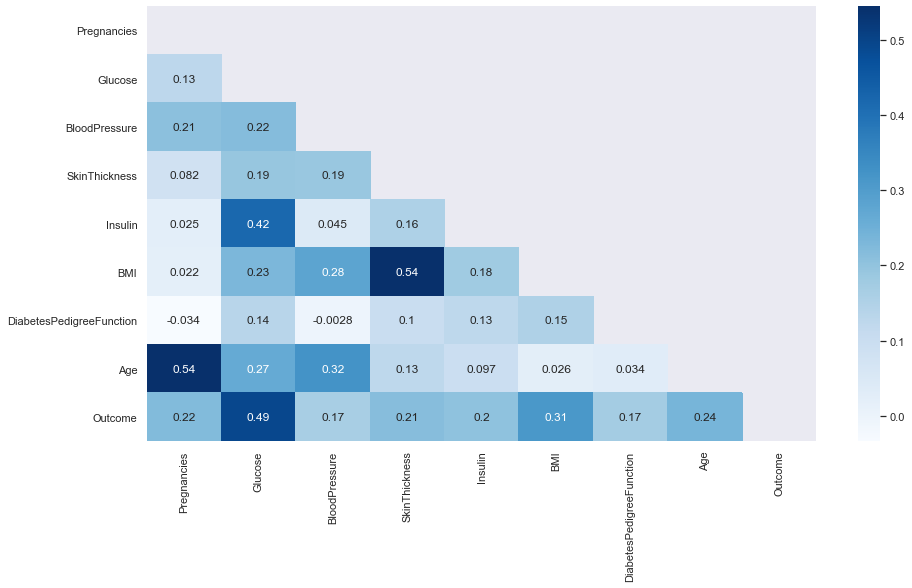

In [10]:
plt.figure(figsize=(15,8))
print('Correlation between various features')

matrix = np.triu(diabetes_data.corr()) #returns the lower triangle of any matrix
sns.heatmap(diabetes_data.corr(), annot=True, mask= matrix, cmap ='Blues')
plt.show()

**the highest correlation is 65% between skin thickness and BMI. Level of Glucose is relatively correlated(49%) with Outcome.**

**The scikit-learn API requires:**

    1) data as a NumPy array or pandas DataFrame,
    
    2) features take on continuous values,
    
    3) there are no missing values in the data. 


**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [11]:
# Create arrays for the features and the response variable
y = diabetes_data['Outcome'].values
X = diabetes_data.drop('Outcome', axis=1).values

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, random_state= 42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [20]:
# apply scaling on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [21]:
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [22]:
for i in range(1,10):
    print('# Neighbors:{0}   train_score: {1:.3f},   test_score: {2:.3f}'.format(i, train_scores[i-1], test_scores[i-1]))

# Neighbors:1   train_score: 1.000,   test_score: 0.684
# Neighbors:2   train_score: 0.845,   test_score: 0.706
# Neighbors:3   train_score: 0.840,   test_score: 0.693
# Neighbors:4   train_score: 0.821,   test_score: 0.710
# Neighbors:5   train_score: 0.821,   test_score: 0.671
# Neighbors:6   train_score: 0.821,   test_score: 0.701
# Neighbors:7   train_score: 0.812,   test_score: 0.697
# Neighbors:8   train_score: 0.804,   test_score: 0.697
# Neighbors:9   train_score: 0.795,   test_score: 0.710


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [23]:
print('Best number of neighbors for train data: {}'.format(np.argmax(train_scores)+1))

Best number of neighbors for train data: 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [24]:
print('Best number of neighbors for test data: {}'.format(np.argmax(test_scores)+1))

Best number of neighbors for test data: 4


Plot the train and test model performance by number of neighbors.

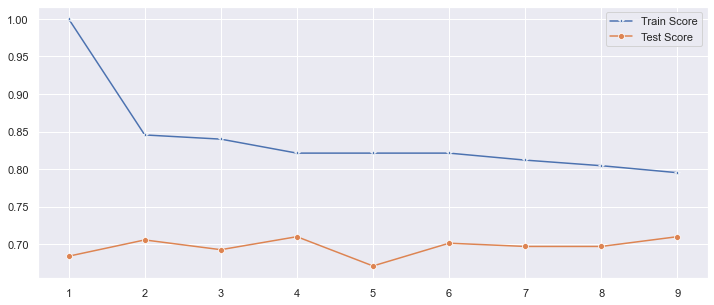

In [25]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [26]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print('score on train set:', round(100* knn.score(X_train, y_train),2))
print('score on test set:', round(100* knn.score(X_test, y_test),2))

score on train set: 82.12
score on test set: 71.0


In [27]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[124,  27],
       [ 40,  40]], dtype=int64)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

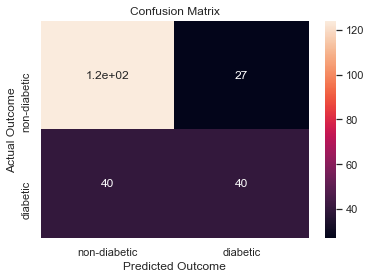

In [28]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted Outcome');ax.set_ylabel('Actual Outcome'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['diabetic', 'non-diabetic']); ax.yaxis.set_ticklabels(['diabetic', 'non-diabetic']);
ax.xaxis.set_ticklabels(['non-diabetic', 'diabetic']); ax.yaxis.set_ticklabels(['non-diabetic', 'diabetic']);

**<font color='teal'> Print the classification report </font>**

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       151
           1       0.60      0.50      0.54        80

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  
#### The model performance isn't horrible, but what if I didn't consider a wide enough range of values in the neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, I define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [30]:
from sklearn.model_selection import GridSearchCV

#Setup the hyperparameter grid
param_grid = {'n_neighbors':np.arange(1,50)}

# Instantiate a K Neighbors classifier
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object: 
knn_cv= GridSearchCV(knn,param_grid,cv=5)

# Fit it to the scaled train data
knn_cv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [31]:
print("Best Score:" , round(knn_cv.best_score_,3))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 0.795
Best Parameters: {'n_neighbors': 11}


**The ideal number of n_neighbors for this model is 11 based on the grid search performed.**

In [32]:
from sklearn.metrics import accuracy_score

knn_cv_optimal= KNeighborsClassifier(n_neighbors = 11)
knn_cv_optimal.fit(X_train_scaled, y_train)
y_pred = knn_cv_optimal.predict(X_test_scaled)
print('Tuned KNeighborsClassifier Accurary(on Test Set):', round(accuracy_score (y_test, y_pred), 2))

Tuned KNeighborsClassifier Accurary(on Test Set): 0.72


**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [33]:
from sklearn.ensemble import RandomForestClassifier

#Setup the hyperparameter grid
param_grid = {'n_estimators': [100,200,300,400,500],
              'max_features':['auto', 'sqrt', 'log2'],
             'criterion' :['gini', 'entropy']}


rf = RandomForestClassifier(random_state=42)

# Instantiate the GridSearchCV object
rf_cv= GridSearchCV(rf, param_grid, cv= 5)

# Fit it to the scaled train data
rf_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [34]:
#what are the best score on train set and what are the best hyperparameters
print('Best score on Train Set:', round(100*rf_cv.best_score_, 2))
print('Best Parameters:', rf_cv.best_params_)

Best score on Train Set: 77.46
Best Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 300}


**Optimal number of trees in Random Forest is 300, and max_features is log2(n_features).**

In [35]:
#Fit an optimal Random Forest model based on best hyperparameters
rf_cl_optimal = RandomForestClassifier(n_estimators= 300, criterion= 'entropy', max_features= 'log2', random_state= 42)
rf_cl_optimal.fit(X_train_scaled, y_train)
print('Tuned Random Forest Accurary(on Test Set):', round(100*rf_cl_optimal.score(X_test_scaled, y_test), 2))

Tuned Random Forest Accurary(on Test Set): 77.06
